/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_236/1497688964.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


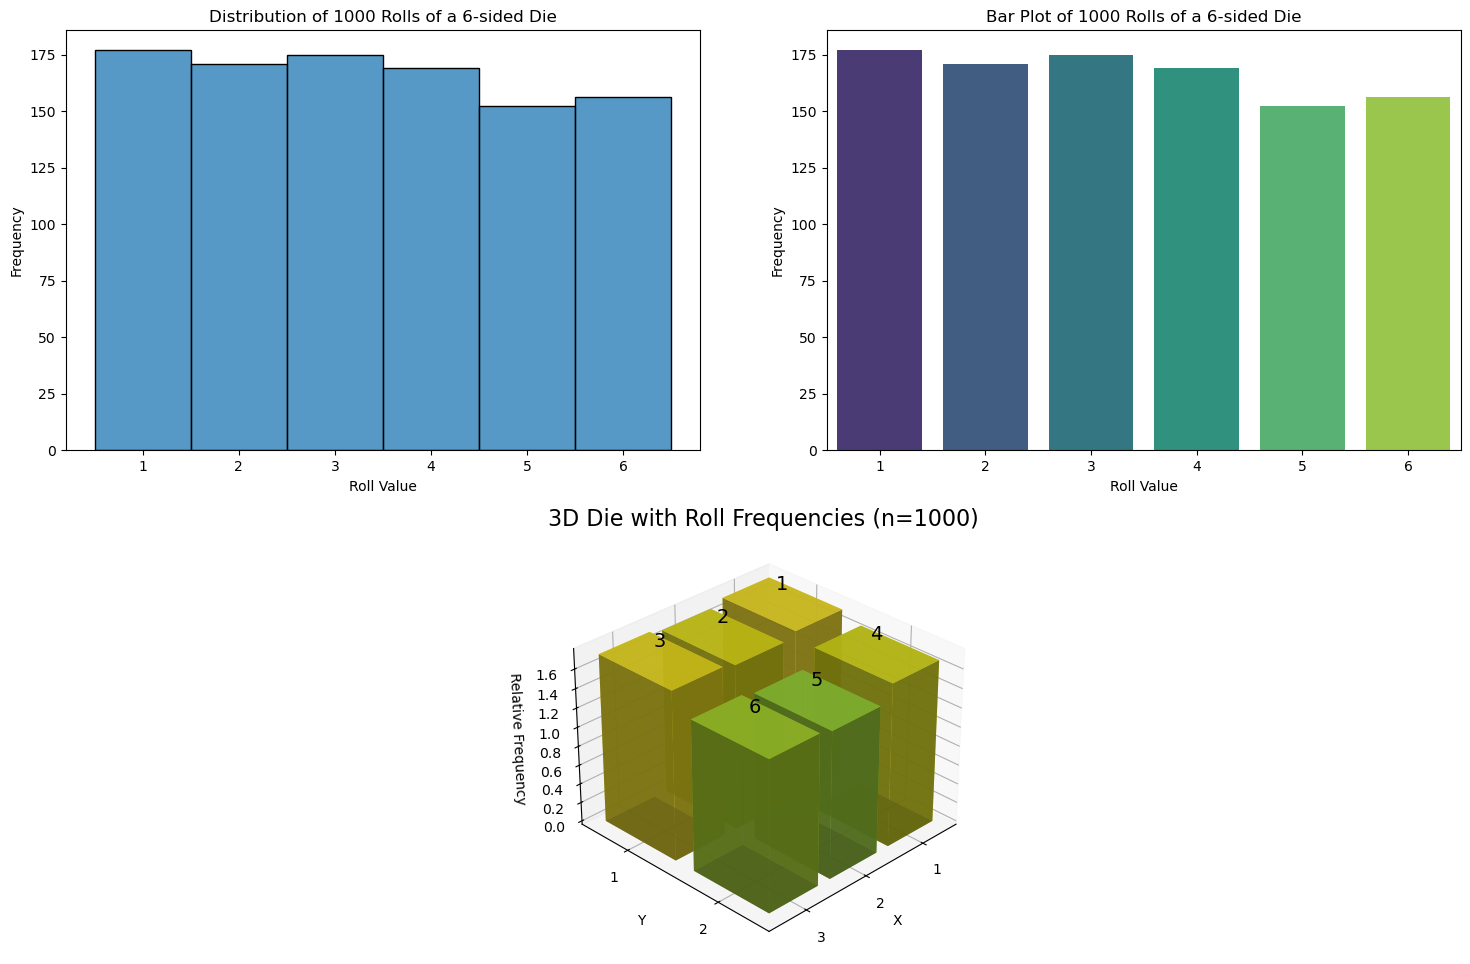

Results of 1000 rolls of a 6-sided die:
Mean: 3.42
Expected mean: 3.50
Frequencies: {1: 177, 2: 171, 3: 175, 4: 169, 5: 152, 6: 156}


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def roll_die(sides=6, num_rolls=1000):
    """
    Simulate rolling an N-sided die multiple times
    
    Parameters:
    sides (int): Number of sides on the die
    num_rolls (int): Number of times to roll the die
    
    Returns:
    list: Results of each roll
    """
    return np.random.randint(1, sides + 1, num_rolls)

# Set parameters
sides = 6  # Default to a standard 6-sided die
num_rolls = 1000  # Increased number of rolls for better visualization

# Perform the simulation
results = roll_die(sides, num_rolls)

# Count occurrences of each value
counts = Counter(results)

# Create a DataFrame for easier plotting
df = pd.DataFrame({'Roll Value': list(counts.keys()), 'Frequency': list(counts.values())})
df = df.sort_values('Roll Value')  # Ensure values are in order

# Set up the figure with 3 subplots
fig = plt.figure(figsize=(18, 12))

# 1. Histogram
ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(results, bins=sides, discrete=True, kde=False, ax=ax1)
ax1.set_title(f'Distribution of {num_rolls} Rolls of a {sides}-sided Die')
ax1.set_xlabel('Roll Value')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(1, sides + 1))

# 2. Bar plot
ax2 = fig.add_subplot(2, 2, 2)
sns.barplot(x='Roll Value', y='Frequency', data=df, palette='viridis', ax=ax2)
ax2.set_title(f'Bar Plot of {num_rolls} Rolls of a {sides}-sided Die')
ax2.set_xlabel('Roll Value')
ax2.set_ylabel('Frequency')

# 3. 3D Die visualization
ax3 = fig.add_subplot(2, 1, 2, projection='3d')

# Create a 3D die with frequencies
x = np.array([1, 2, 3, 1, 2, 3])
y = np.array([1, 1, 1, 2, 2, 2])
z = np.zeros(6)
dx = dy = np.ones(6) * 0.8  # Width and depth of each face
dz = np.array([counts.get(i, 0) for i in range(1, sides+1)]) / num_rolls * 10  # Height based on frequency

# Create the 3D bars
ax3.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(dz/max(dz)), shade=True, alpha=0.8)

# Add die face numbers
for i in range(6):
    ax3.text(x[i] + dx[i]/2, y[i] + dy[i]/2, dz[i] + 0.1, str(i+1), 
             horizontalalignment='center', verticalalignment='bottom', fontsize=14)

ax3.set_title(f'3D Die with Roll Frequencies (n={num_rolls})', fontsize=16)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Relative Frequency')
ax3.set_xticks([1.4, 2.4, 3.4])
ax3.set_xticklabels(['1', '2', '3'])
ax3.set_yticks([1.4, 2.4])
ax3.set_yticklabels(['1', '2'])
ax3.view_init(elev=30, azim=45)  # Set viewing angle

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Results of {num_rolls} rolls of a {sides}-sided die:")
print(f"Mean: {np.mean(results):.2f}")
print(f"Expected mean: {(sides + 1) / 2:.2f}")
print(f"Frequencies: {dict(sorted(counts.items()))}")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

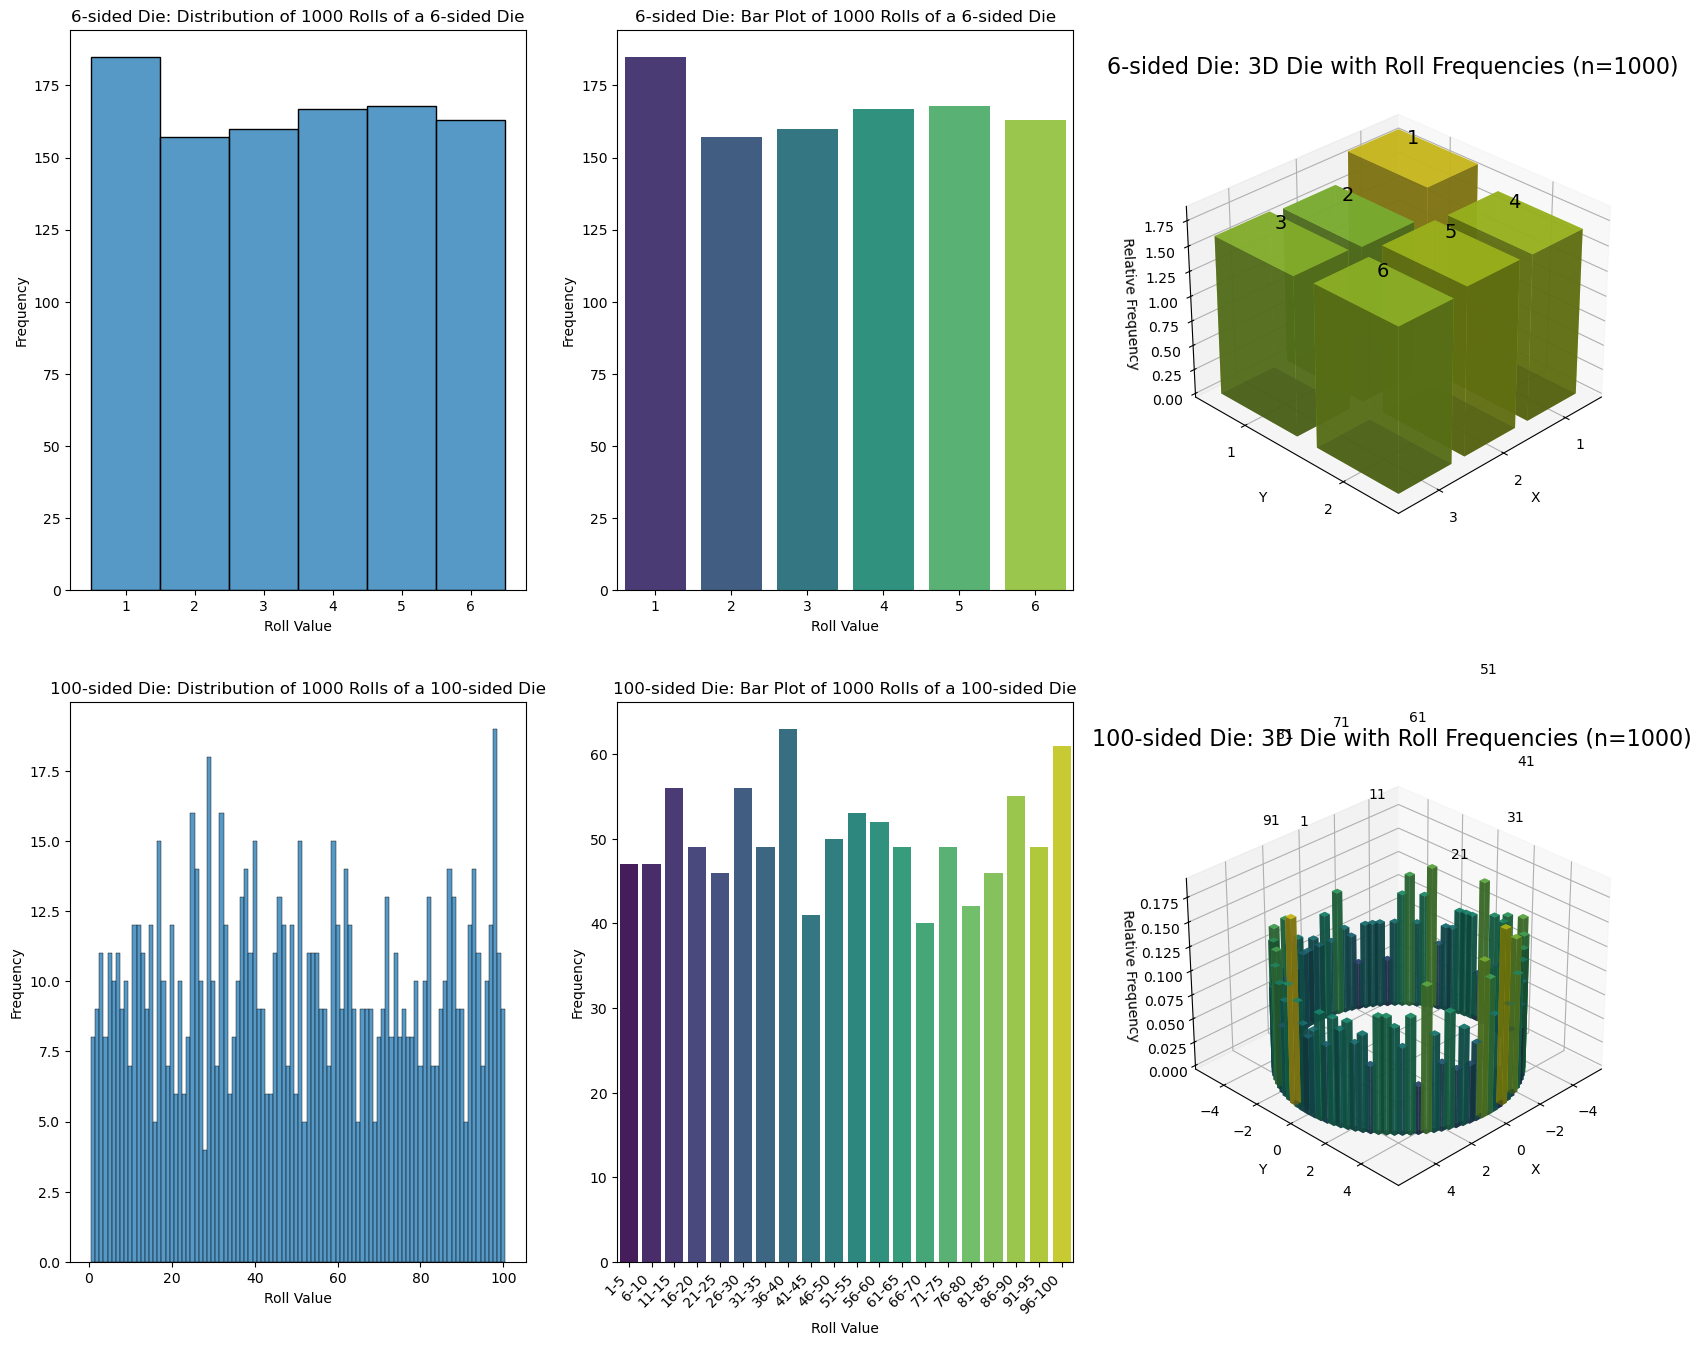

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.gridspec as gridspec

def roll_die(sides=6, num_rolls=1000):
    """
    Simulate rolling an N-sided die multiple times
    
    Parameters:
    sides (int): Number of sides on the die
    num_rolls (int): Number of times to roll the die
    
    Returns:
    list: Results of each roll
    """
    return np.random.randint(1, sides + 1, num_rolls)

def plot_die_results(sides, num_rolls, ax_hist, ax_bar, ax_3d, title_prefix=""):
    # Perform the simulation
    results = roll_die(sides, num_rolls)
    
    # Count occurrences of each value
    counts = Counter(results)
    
    # Create a DataFrame for easier plotting
    df = pd.DataFrame({'Roll Value': list(counts.keys()), 'Frequency': list(counts.values())})
    df = df.sort_values('Roll Value')  # Ensure values are in order
    
    # 1. Histogram
    sns.histplot(results, bins=sides, discrete=True, kde=False, ax=ax_hist)
    ax_hist.set_title(f'{title_prefix} Distribution of {num_rolls} Rolls of a {sides}-sided Die')
    ax_hist.set_xlabel('Roll Value')
    ax_hist.set_ylabel('Frequency')
    if sides <= 20:  # Only set individual ticks for smaller dice
        ax_hist.set_xticks(range(1, sides + 1, max(1, sides//10)))
    
    # 2. Bar plot
    if sides <= 20:  # For smaller dice, show all values
        sns.barplot(x='Roll Value', y='Frequency', data=df, palette='viridis', ax=ax_bar)
    else:  # For larger dice, sample values to avoid overcrowding
        # Group data into bins for larger dice
        bins = 20
        bin_size = sides // bins
        df['Bin'] = ((df['Roll Value'] - 1) // bin_size) + 1
        df_grouped = df.groupby('Bin').agg({'Frequency': 'sum'}).reset_index()
        df_grouped['Bin Label'] = df_grouped['Bin'].apply(
            lambda x: f"{(x-1)*bin_size+1}-{min(x*bin_size, sides)}")
        sns.barplot(x='Bin Label', y='Frequency', data=df_grouped, palette='viridis', ax=ax_bar)
        ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45, ha='right')
    
    ax_bar.set_title(f'{title_prefix} Bar Plot of {num_rolls} Rolls of a {sides}-sided Die')
    ax_bar.set_xlabel('Roll Value')
    ax_bar.set_ylabel('Frequency')
    
    # 3. 3D Die visualization
    if sides == 6:
        # For 6-sided die, use a cube representation
        x = np.array([1, 2, 3, 1, 2, 3])
        y = np.array([1, 1, 1, 2, 2, 2])
        z = np.zeros(6)
        dx = dy = np.ones(6) * 0.8  # Width and depth of each face
        dz = np.array([counts.get(i, 0) for i in range(1, sides+1)]) / num_rolls * 10  # Height based on frequency
        
        # Create the 3D bars
        ax_3d.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(dz/max(dz)), shade=True, alpha=0.8)
        
        # Add die face numbers
        for i in range(6):
            ax_3d.text(x[i] + dx[i]/2, y[i] + dy[i]/2, dz[i] + 0.1, str(i+1), 
                     horizontalalignment='center', verticalalignment='bottom', fontsize=14)
        
        ax_3d.set_xticks([1.4, 2.4, 3.4])
        ax_3d.set_xticklabels(['1', '2', '3'])
        ax_3d.set_yticks([1.4, 2.4])
        ax_3d.set_yticklabels(['1', '2'])
        
    else:
        # For 100-sided die, use a circular arrangement
        theta = np.linspace(0, 2*np.pi, sides, endpoint=False)
        radius = 5
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        z = np.zeros(sides)
        
        # Width and depth for each segment
        dx = 0.3 * np.ones(sides)
        dy = 0.3 * np.ones(sides)
        
        # Height based on frequency
        dz = np.array([counts.get(i, 0) for i in range(1, sides+1)]) / num_rolls * 10
        
        # Create the 3D bars
        ax_3d.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(dz/max(dz)), shade=True, alpha=0.8)
        
        # Add labels for some key points (not all 100 to avoid clutter)
        for i in range(0, sides, 10):
            ax_3d.text(x[i], y[i], dz[i] + 0.2, str(i+1), 
                     horizontalalignment='center', verticalalignment='bottom', fontsize=10)
    
    ax_3d.set_title(f'{title_prefix} 3D Die with Roll Frequencies (n={num_rolls})', fontsize=16)
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Relative Frequency')
    ax_3d.view_init(elev=30, azim=45)  # Set viewing angle
    
    # Return statistics
    stats = {
        "mean": np.mean(results),
        "expected_mean": (sides + 1) / 2,
        "frequencies": dict(sorted(counts.items()))
    }
    return stats

# Set up the figure with a grid layout
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])

# 6-sided die plots
ax_hist_6 = plt.subplot(gs[0, 0])
ax_bar_6 = plt.subplot(gs[0, 1])
ax_3d_6 = plt.subplot(gs[0, 2], projection='3d')

# 100-sided die plots
ax_hist_100 = plt.subplot(gs[1, 0])
ax_bar_100 = plt.subplot(gs[1, 1])
ax_3d_100 = plt.subplot(gs[1, 2], projection='3d')

# Number of rolls
num_rolls = 1000

# Plot 6-sided die
stats_6 = plot_die_results(6, num_rolls, ax_hist_6, ax_bar_6, ax_3d_6, "6-sided Die:")

# Plot 100-sided die
stats_100 = plot_die_results(100, num_rolls, ax_hist_100, ax_bar_100, ax_3d_100, "100-sided Die:")

plt.tight_layout